<a href="https://colab.research.google.com/drive/1Ohbu1EgL06hQwXLKyAWvDEJeOnufZ0qD">Abre este Jupyter en Google Colab</a>

# Introducción a Pandas

[Pandas](https://pandas.pydata.org/about/index.html) es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. 
* La estructura de datos principal es el DataFrame, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de columna y etiquetas de fila). 
* Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, trazar gráficos, etc.
* Proporciona un alto rendimiento para manipular (unir, dividir, modificar…) grandes conjuntos de datos

## Import

In [1]:
# Instalación de Pandas
!pip install pandas
!pip install pyarrow

In [1]:
import pandas as pd

## Estructuras de datos en Pandas

La librería Pandas, de manera genérica, contiene las siguientes estructuras de datos:
* **Series**: Array de una dimensión
* **DataFrame**: Se corresponde con una tabla de 2 dimensiones
* **Panel**: Similar a un diccionario de DataFrames

## Creación del objeto Series

In [2]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [3]:
# Creación de un objeto Series inicializándolo con un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura)
print(s)

Santiago    187
Pedro       178
Julia       170
Ana         165
dtype: int64


In [5]:
# Creación de un objeto Series inicializándolo con algunos 
# de los elementos de un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura, index = ["Pedro", "Julia"])
print(s)

Pedro    178
Julia    170
dtype: int64


In [6]:
# Creación de un objeto Series inicializandolo con un escalar
s = pd.Series(34, ["test1", "test2", "test3"])
print(s)

test1    34
test2    34
test3    34
dtype: int64


## Acceso a los elementos de un objeto Series

Cada elemento en un objeto Series tiene un identificador único que se denomina **_index label_**.

In [4]:
# Creación de un objeto Series
s = pd.Series([2, 4, 6, 8], index=["num1", "num2", "num3", "num4"])
print(s)

num1    2
num2    4
num3    6
num4    8
dtype: int64


In [5]:
# Accediendo al tercer elemento del objeto
s["num3"]

6

In [6]:
# Tambien se puede acceder al elemento por posición
s[2]

6

In [10]:
# loc es la forma estándar de acceder a un elemento de un objeto Series por atributo
s.loc["num3"]

6

In [11]:
# iloc es la forma estándar de acceder a un elemento de un objeto Series por posición
s.iloc[2]

6

In [12]:
# Accediendo al segundo y tercer elemento por posición
s.iloc[2:4]

num3    6
num4    8
dtype: int64

## Operaciones aritméticas con Series

In [7]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [8]:
# Los objeto Series son similares y compatibles con los Arrays de Numpy
import numpy as np
# Ufunc de Numpy para sumar los elementos de un Array
np.sum(s)

30

In [9]:
# El resto de operaciones aritméticas de Numpy sobre Arrays también son posibles
# Más información al respecto en la Introducción a Numpy
s * 2

0     4
1     8
2    12
3    16
4    20
dtype: int64

## Representación gráfica de un objeto Series

In [11]:
# Creación de un objeto Series denominado Temperaturas
temperaturas = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9]
s = pd.Series(temperaturas, name="Temperaturas")
s

0     4.4
1     5.1
2     6.1
3     6.2
4     6.1
5     6.1
6     5.7
7     5.2
8     4.7
9     4.1
10    3.9
Name: Temperaturas, dtype: float64

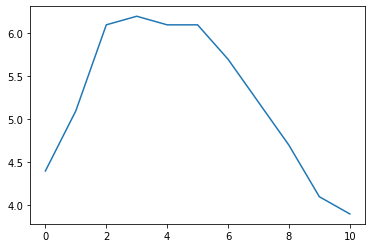

In [12]:
# Representación gráfica del objeto Series
%matplotlib inline
import matplotlib.pyplot as plt

s.plot()
plt.show()

## Creación de un objeto DataFrame

In [13]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


Puede forzarse al DataFrame a que presente unas columnas determinadas y en un orden determinado

In [17]:
# Creación de un DataFrame inicializándolo con algunos elementos de un diccionario
# de objetos Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(
        personas,
        columns = ["altura", "peso"],
        index = ["Ana", "Julia", "Santiago"])
df

,altura,peso
Ana,165,56
Julia,170,64
Santiago,187,84


In [18]:
# Creación de un DataFrame inicializándolo con una lista de listas de Python
# Importante: Deben especificarse las columnas e indices por separado
valores = [
    [185, 4, 76],
    [170, 0, 65],
    [190, 1, 89]
]

df = pd.DataFrame(
        valores,
        columns = ["altura", "hijos", "peso"],
        index = ["Pedro", "Ana", "Juan"])
df

,altura,hijos,peso
Pedro,185,4,76
Ana,170,0,65
Juan,190,1,89


In [19]:
# Creación de un DataFrame inicializándolo con un diccionario de Python
personas = {
    "altura": {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}, 
    "peso": {"Santiago": 87, "Pedro": 78, "Julia": 70, "Ana": 65}}

df = pd.DataFrame(personas)
df

,altura,peso
Santiago,187,87
Pedro,178,78
Julia,170,70
Ana,165,65


## Acceso a los elementos de un DataFrame

In [21]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las columnas del DataFrame

In [22]:
df["peso"]

Ana         56
Julia       64
Pedro       90
Santiago    84
Name: peso, dtype: int64

In [23]:
df[["peso", "altura"]]

,peso,altura
Ana,56,165
Julia,64,170
Pedro,90,178
Santiago,84,187


In [25]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df["peso"] > 80

Ana         False
Julia       False
Pedro        True
Santiago     True
Name: peso, dtype: bool

In [24]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df[df["peso"] > 80]

,peso,altura,hijos
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las filas del DataFrame

In [25]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [26]:
df.loc["Pedro"]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [29]:
df.iloc[2]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [27]:
df.iloc[1:3]

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0


### Consulta avanzada de los elementos de un DataFrame

In [31]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [28]:
df.query("altura >= 170 and peso > 60")

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


## Copiar un DataFrame

In [33]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [29]:
# Copia del DataFrame df en df_copy
# Importante: Al modificar un elemento de df_copy no se modifica df
df_copy = df.copy()
df_copy

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


## Modificación de un DataFrame

In [30]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [31]:
# Añadir una nueva columna al DataFrame
df["cumpleaños"] = [1990, 1987, 1980, 1994]
df

,peso,altura,hijos,cumpleaños
Ana,56,165,NaN,1990
Julia,64,170,3.0,1987
Pedro,90,178,2.0,1980
Santiago,84,187,NaN,1994


In [32]:
# Añadir una nueva columna calculada al DataFrame
df["años"] = 2020 - df["cumpleaños"]
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [33]:
# Añadir una nueva columna creando un DataFrame nuevo
df_mod = df.assign(mascotas = [1, 3, 0, 0])
df_mod

,peso,altura,hijos,cumpleaños,años,mascotas
Ana,56,165,NaN,1990,30,1
Julia,64,170,3.0,1987,33,3
Pedro,90,178,2.0,1980,40,0
Santiago,84,187,NaN,1994,26,0


In [34]:
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [35]:
# Eliminar una columna existente del DataFrame
del df["peso"]
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


In [36]:
# Eliminar una columna existente devolviendo una copia del DataFrame resultante
df_mod = df.drop(["hijos"], axis=1)
df_mod

,altura,cumpleaños,años
Ana,165,1990,30
Julia,170,1987,33
Pedro,178,1980,40
Santiago,187,1994,26


In [42]:
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


## Evaluación de expresiones sobre un DataFrame

In [37]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [38]:
# Evaluar una función sobre una columna del DataFrame
df.eval("altura / 2")

Ana         82.5
Julia       85.0
Pedro       89.0
Santiago    93.5
dtype: float64

In [42]:
# Asignar el valor resultante como una nueva columna
df.eval("media_altura = altura / 2", inplace=True)
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


In [43]:
# Evaluar una función utilizando una variable local
max_altura = 180
df.eval("altura > @max_altura")

Ana         False
Julia       False
Pedro       False
Santiago     True
dtype: bool

In [44]:
# Aplicar una función externa a una columna del DataFrame
def func(x):
    return x + 2

df["peso"].apply(func)

Ana         58
Julia       66
Pedro       92
Santiago    86
Name: peso, dtype: int64

In [45]:
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


## Guardar y Cargar el DataFrame

In [49]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [50]:
# Guardar el DataFrame como CSV, HTML y JSON
df.to_csv("df_personas.csv")
df.to_html("df_personas.html")
df.to_json("df_personas.json")

In [51]:
# Cargar el DataFrame en Jupyter
df2 = pd.read_csv("df_personas.csv")

In [52]:
df2

,Unnamed: 0,peso,altura,hijos
0,Ana,56,165,NaN
1,Julia,64,170,3.0
2,Pedro,90,178,2.0
3,Santiago,84,187,NaN


In [53]:
# Cargar el DataFrame con la primera columna correctamente asignada
df2 = pd.read_csv("df_personas.csv", index_col=0)
df2

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN
